In [120]:
import pandas as pd

# Carregar os dados usando a codificação 'ISO-8859-1'
base_crimes = pd.read_csv('BaseDPEvolucaoMensalCisp.csv', encoding='ISO-8859-1', delimiter=';', low_memory=False)
delegacias = pd.read_csv('delegacias.csv', encoding='ISO-8859-1', delimiter=';')
populacao  = pd.read_csv('PopulacaoEvolucaoMensalCisp.csv', encoding='ISO-8859-1',delimiter=';')

# Visualizar as primeiras linhas dos DataFrames
print(base_crimes.head())
print(delegacias.head())
print(populacao.head()) 


   CISP  mes  vano mes_ano  AISP  RISP           munic    mcirc   Regiao  \
0     1    1  2003  2003m1     5     1  Rio de Janeiro  3304557  Capital   
1     4    1  2003  2003m1     5     1  Rio de Janeiro  3304557  Capital   
2     5    1  2003  2003m1     5     1  Rio de Janeiro  3304557  Capital   
3     6    1  2003  2003m1     1     1  Rio de Janeiro  3304557  Capital   
4     7    1  2003  2003m1     1     1  Rio de Janeiro  3304557  Capital   

   hom_doloso  ...  pessoas_desaparecidas  encontro_cadaver  encontro_ossada  \
0           0  ...                      2                 0                0   
1           3  ...                      6                 0                1   
2           3  ...                      2                 1                0   
3           6  ...                      2                 1                0   
4           4  ...                      1                 3                0   

   pol_militares_mortos_serv  pol_civis_mortos_serv  indicador

#  Inspecionar e Limpar os Dados:

In [121]:
    # Verificar os dados
print(base_crimes.head())
print(delegacias.head())
print(populacao.head())

# Verificar valores ausentes
print(base_crimes.isnull().sum())
print(delegacias.isnull().sum())
print(populacao.isnull().sum())


   CISP  mes  vano mes_ano  AISP  RISP           munic    mcirc   Regiao  \
0     1    1  2003  2003m1     5     1  Rio de Janeiro  3304557  Capital   
1     4    1  2003  2003m1     5     1  Rio de Janeiro  3304557  Capital   
2     5    1  2003  2003m1     5     1  Rio de Janeiro  3304557  Capital   
3     6    1  2003  2003m1     1     1  Rio de Janeiro  3304557  Capital   
4     7    1  2003  2003m1     1     1  Rio de Janeiro  3304557  Capital   

   hom_doloso  ...  pessoas_desaparecidas  encontro_cadaver  encontro_ossada  \
0           0  ...                      2                 0                0   
1           3  ...                      6                 0                1   
2           3  ...                      2                 1                0   
3           6  ...                      2                 1                0   
4           4  ...                      1                 3                0   

   pol_militares_mortos_serv  pol_civis_mortos_serv  indicador

Preencher Valores Ausentes com a Média (Somente para Colunas Numéricas)

In [124]:
# Selecionar apenas colunas numéricas
colunas_numericas = base_crimes.select_dtypes(include=['number'])

# Preencher valores ausentes com a média
base_crimes[colunas_numericas.columns] = colunas_numericas.fillna(colunas_numericas.mean())


Remover Registros com Valores Ausentes

In [125]:
# Remover registros com valores ausentes em qualquer coluna
base_crimes.dropna(inplace=True)


In [126]:
# Preencher valores ausentes em colunas categóricas com a moda (valor mais frequente)
colunas_categoricas = base_crimes.select_dtypes(include=['object'])
for coluna in colunas_categoricas.columns:
    base_crimes[coluna].fillna(base_crimes[coluna].mode()[0], inplace=True)


C:\Users\Thaleson\AppData\Local\Temp\ipykernel_10484\975217490.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_crimes[coluna].fillna(base_crimes[coluna].mode()[0], inplace=True)


Verificar Tipos de Dados e Valores Ausentes

In [127]:
# Verificar os tipos de dados
print(base_crimes.dtypes)

# Verificar se ainda há valores ausentes
print(base_crimes.isnull().sum())


CISP                     int64
mes                      int64
vano                     int64
mes_ano                 object
AISP                     int64
                         ...  
indicador_letalidade     int64
indicador_roubo_rua      int64
indicador_roubo_veic     int64
registro_ocorrencias     int64
fase                     int64
Length: 63, dtype: object
CISP                    0
mes                     0
vano                    0
mes_ano                 0
AISP                    0
                       ..
indicador_letalidade    0
indicador_roubo_rua     0
indicador_roubo_veic    0
registro_ocorrencias    0
fase                    0
Length: 63, dtype: int64


Verificação e Tratamento de Dados Não Numéricos

# Análise Temporal

In [129]:
# Verificar alguns exemplos da coluna 'mes_ano'
print(base_crimes['mes_ano'].head())


0    2003m1
1    2003m1
2    2003m1
3    2003m1
4    2003m1
Name: mes_ano, dtype: object


In [130]:
# Remover 'm' e converter para formato de data
base_crimes['mes_ano'] = base_crimes['mes_ano'].str.replace('m', '', regex=False)
base_crimes['data'] = pd.to_datetime(base_crimes['mes_ano'], format='%Ym%m', errors='coerce')


In [132]:
# Verificar valores ausentes após a conversão
print(base_crimes['data'].isnull().sum())


26217


In [134]:
# Remover 'm' e converter para formato de data
base_crimes['mes_ano'] = base_crimes['mes_ano'].str.replace('m', '', regex=False)
base_crimes['data'] = pd.to_datetime(base_crimes['mes_ano'], format='%Ym%m', errors='coerce')


In [138]:
# Converter 'mes_ano' para o formato de data
base_crimes['data'] = pd.to_datetime(base_crimes['mes_ano'], format='%Y%m', errors='coerce')


In [137]:
# Remover espaços extras e caracteres indesejados da coluna 'mes_ano'
base_crimes['mes_ano'] = base_crimes['mes_ano'].str.strip().str.replace(' ', '', regex=False)


In [136]:
# Verificar alguns exemplos da coluna 'mes_ano'
print(base_crimes['mes_ano'].unique())


['20031' '20032' '20033' '20034' '20035' '20036' '20037' '20038' '20039'
 '200310' '200311' '200312' '20041' '20042' '20043' '20044' '20045'
 '20046' '20047' '20048' '20049' '200410' '200411' '200412' '20051'
 '20052' '20053' '20054' '20055' '20056' '20057' '20058' '20059' '200510'
 '200511' '200512' '20061' '20062' '20063' '20064' '20065' '20066' '20067'
 '20068' '20069' '200610' '200611' '200612' '20071' '20072' '20073'
 '20074' '20075' '20076' '20077' '20078' '20079' '200710' '200711'
 '200712' '20081' '20082' '20083' '20084' '20085' '20086' '20087' '20088'
 '20089' '200810' '200811' '200812' '20091' '20092' '20093' '20094'
 '20095' '20096' '20097' '20098' '20099' '200910' '200911' '200912'
 '20101' '20102' '20103' '20104' '20105' '20106' '20107' '20108' '20109'
 '201010' '201011' '201012' '20111' '20112' '20113' '20114' '20115'
 '20116' '20117' '20118' '20119' '201110' '201111' '201112' '20121'
 '20122' '20123' '20124' '20125' '20126' '20127' '20128' '20129' '201210'
 '201211' '201

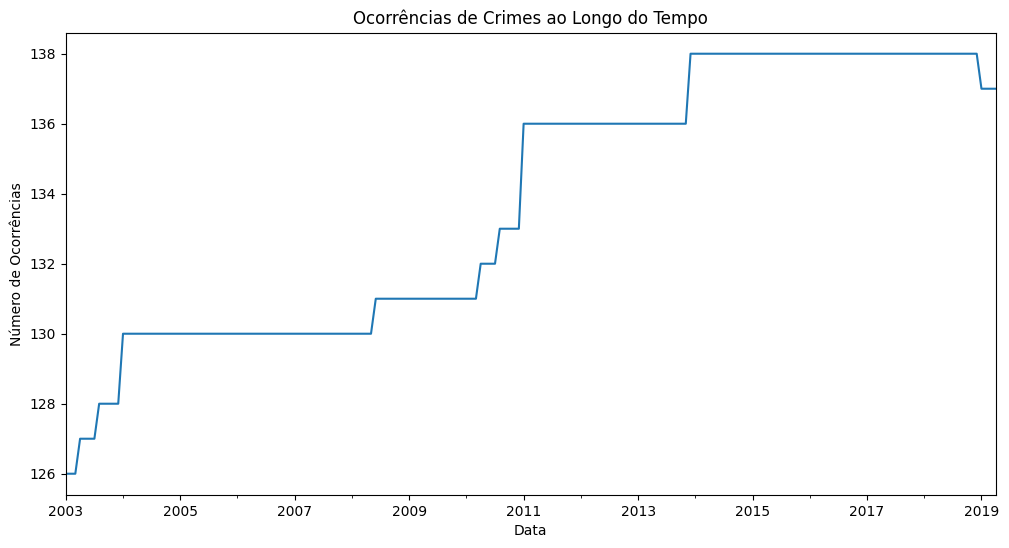

In [140]:
import matplotlib.pyplot as plt

# Contar ocorrências de crimes por mês
ocorrencias_por_mes = base_crimes.groupby('data').size()

# Plotar as ocorrências ao longo do tempo
plt.figure(figsize=(12, 6))
ocorrencias_por_mes.plot()
plt.title('Ocorrências de Crimes ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Ocorrências')
plt.show()


# Analisar e Visualizar Dados das Delegacias

In [141]:
# Visualizar as primeiras linhas do dataframe das delegacias
print(delegacias.head())

# Verificar valores ausentes nas delegacias
print(delegacias.isnull().sum())

# Verificar os tipos de dados nas delegacias
print(delegacias.dtypes)


   CISP                               nome  \
0     1          001Âª DP â PraÃ§a MauÃ¡   
1     4  004Âª DP â PraÃ§a da RepÃºblica   
2     5            005Âª DP â Mem de SÃ¡   
3     6           006Âª DP â Cidade Nova   
4     7          007Âª DP â Santa Teresa   

                                      endereco  \
0  Atendendo provisÃ³riamente na sede da 4ÂªDP   
1               PraÃ§a Cristiano Ottoni, s/nÂº   
2               Av. Gomes Freire, 320 - Centro   
3               Rua Prof. Clementino Fraga, 77   
4                   Rua Francisco de Castro, 5   

                              delegado  
0            ClÃ¡udio Vieira de Campos  
1       Daniel Mayr Pereira da CostaÂ   
2  Marcus Henrique de Oliveira AlvesÂ   
3     Maria Aparecida Salgado MalletÂ   
4         Orlando Zaccone D Elia Filho  
CISP        0
nome        0
endereco    0
delegado    0
dtype: int64
CISP         int64
nome        object
endereco    object
delegado    object
dtype: object


In [142]:
# Função para limpar caracteres especiais
def clean_text(text):
    if isinstance(text, str):
        return text.replace('Âª', 'ª').replace('â', '–')
    return text

# Aplicar a função de limpeza em todas as colunas de texto
delegacias = delegacias.applymap(clean_text)

# Verificar se a limpeza foi bem-sucedida
print(delegacias.head())


   CISP                            nome  \
0     1          001ª DP – PraÃ§a MauÃ¡   
1     4  004ª DP – PraÃ§a da RepÃºblica   
2     5            005ª DP – Mem de SÃ¡   
3     6           006ª DP – Cidade Nova   
4     7          007ª DP – Santa Teresa   

                                     endereco  \
0  Atendendo provisÃ³riamente na sede da 4ªDP   
1              PraÃ§a Cristiano Ottoni, s/nÂº   
2              Av. Gomes Freire, 320 - Centro   
3              Rua Prof. Clementino Fraga, 77   
4                  Rua Francisco de Castro, 5   

                              delegado  
0            ClÃ¡udio Vieira de Campos  
1       Daniel Mayr Pereira da CostaÂ   
2  Marcus Henrique de Oliveira AlvesÂ   
3     Maria Aparecida Salgado MalletÂ   
4         Orlando Zaccone D Elia Filho  


C:\Users\Thaleson\AppData\Local\Temp\ipykernel_10484\350961390.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  delegacias = delegacias.applymap(clean_text)


Unir Dados de Crimes e Delegacias

Para associar os crimes com as delegacias, é necessário identificar uma chave comum, como o código da delegacia ou a área correspondente. Se a chave não existir, você pode precisar fazer uma associação com base em localizações geográficas.

In [145]:
# Unir os dados de crimes com as delegacias usando a coluna 'CISP'
crimes_delegacias = pd.merge(base_crimes, delegacias, on='CISP', how='left')

# Verificar algumas linhas do dataframe resultante
print(crimes_delegacias.head())


   CISP  mes  vano mes_ano  AISP  RISP           munic    mcirc   Regiao  \
0     1    1  2003   20031     5     1  Rio de Janeiro  3304557  Capital   
1     4    1  2003   20031     5     1  Rio de Janeiro  3304557  Capital   
2     5    1  2003   20031     5     1  Rio de Janeiro  3304557  Capital   
3     6    1  2003   20031     1     1  Rio de Janeiro  3304557  Capital   
4     7    1  2003   20031     1     1  Rio de Janeiro  3304557  Capital   

   hom_doloso  ...  pol_civis_mortos_serv  indicador_letalidade  \
0           0  ...                      0                     0   
1           3  ...                      0                     3   
2           3  ...                      0                     3   
3           6  ...                      0                     6   
4           4  ...                      0                     4   

   indicador_roubo_rua  indicador_roubo_veic  registro_ocorrencias  fase  \
0                   66                     5                   5

In [146]:
# Verificar o número de linhas após a junção
print("Número de linhas após a junção:", len(crimes_delegacias))

# Verificar se há valores ausentes na coluna das delegacias
print(crimes_delegacias[['nome', 'endereco', 'delegado']].isnull().sum())


Número de linhas após a junção: 26217
nome        0
endereco    0
delegado    0
dtype: int64


 # Análise da Distribuição de Crimes por Delegacia:

Analisar Padrões de Crime

In [148]:
# Selecionar apenas colunas numéricas
colunas_numericas = crimes_delegacias.select_dtypes(include=['number']).columns

# Agrupar os dados por delegacia e somar as ocorrências de crimes apenas para as colunas numéricas
crimes_por_delegacia = crimes_delegacias.groupby('nome')[colunas_numericas].sum()

# Exibir os primeiros resultados
print(crimes_por_delegacia.head())


                                CISP   mes    vano  AISP  RISP      mcirc  \
nome                                                                        
001ª DP – PraÃ§a MauÃ¡           196  1258  394092   980   196  647693172   
004ª DP – PraÃ§a da RepÃºblica   784  1258  394092   980   196  647693172   
005ª DP – Mem de SÃ¡             980  1258  394092  1772   196  647693172   
006ª DP – Cidade Nova           1176  1258  394092   478   196  647693172   
007ª DP – Santa Teresa          1372  1258  394092   572   196  647693172   

                                hom_doloso  lesao_corp_morte  latrocinio  \
nome                                                                       
001ª DP – PraÃ§a MauÃ¡                  73                 2          16   
004ª DP – PraÃ§a da RepÃºblica         380                17          16   
005ª DP – Mem de SÃ¡                   195                 7          15   
006ª DP – Cidade Nova                  686                13          22   
007ª

# Análise Descritiva



In [149]:
# Selecionar as colunas principais para análise descritiva
colunas_crimes = ['hom_doloso', 'roubo_veiculo', 'total_roubos', 'furto_veiculos']

# Calcular a média, mediana e desvio padrão
media_crimes = crimes_por_delegacia[colunas_crimes].mean()
mediana_crimes = crimes_por_delegacia[colunas_crimes].median()
desvio_padrao_crimes = crimes_por_delegacia[colunas_crimes].std()

# Exibir os resultados
print("Média dos crimes por delegacia:\n", media_crimes)
print("\nMediana dos crimes por delegacia:\n", mediana_crimes)
print("\nDesvio padrão dos crimes por delegacia:\n", desvio_padrao_crimes)


Média dos crimes por delegacia:
 hom_doloso          633.369565
roubo_veiculo      3861.833333
total_roubos      17334.014493
furto_veiculos     2199.413043
dtype: float64

Mediana dos crimes por delegacia:
 hom_doloso         317.5
roubo_veiculo      920.5
total_roubos      7028.5
furto_veiculos    1451.0
dtype: float64

Desvio padrão dos crimes por delegacia:
 hom_doloso          781.448039
roubo_veiculo      5641.151756
total_roubos      21538.864919
furto_veiculos     2421.521280
dtype: float64


# Visualização Gráfica

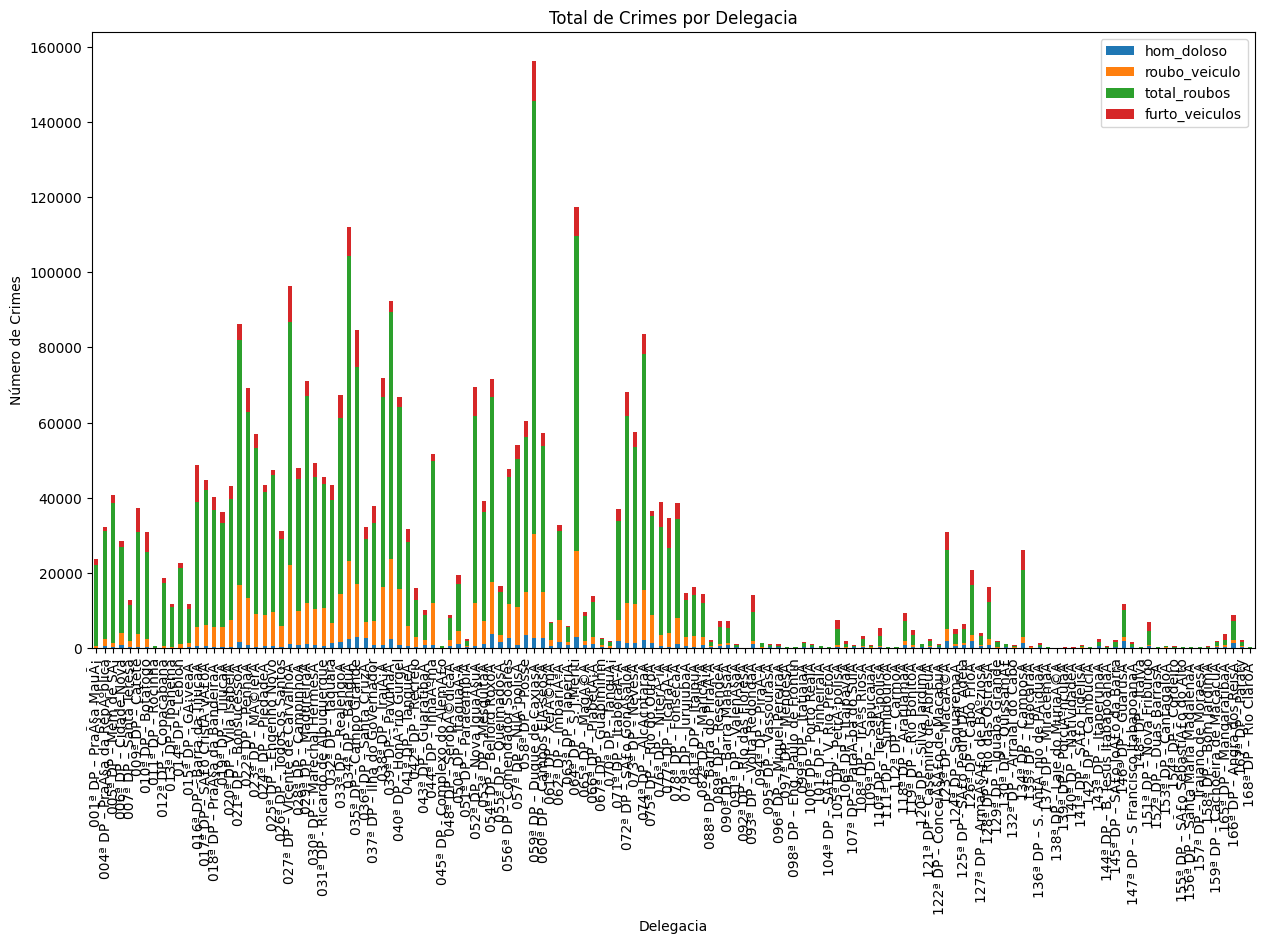

In [150]:
import matplotlib.pyplot as plt

# Plotar gráfico de barras para os crimes selecionados
crimes_por_delegacia[colunas_crimes].plot(kind='bar', figsize=(15, 8), stacked=True)
plt.title('Total de Crimes por Delegacia')
plt.xlabel('Delegacia')
plt.ylabel('Número de Crimes')
plt.show()


# Mapeamento das Delegacias

In [151]:
%pip install folium 

In [153]:
dados_coordenadas = {
    'nome': [
        '001ª DP – Praça Mauá', 
        '004ª DP – Praça da República', 
        '005ª DP – Mem de Sá', 
        '006ª DP – Cidade Nova', 
        '007ª DP – Santa Teresa'
    ],
    'latitude': [-22.896, -22.906, -22.908, -22.912, -22.916],
    'longitude': [-43.183, -43.185, -43.191, -43.195, -43.200]
}

coordenadas_df = pd.DataFrame(dados_coordenadas)


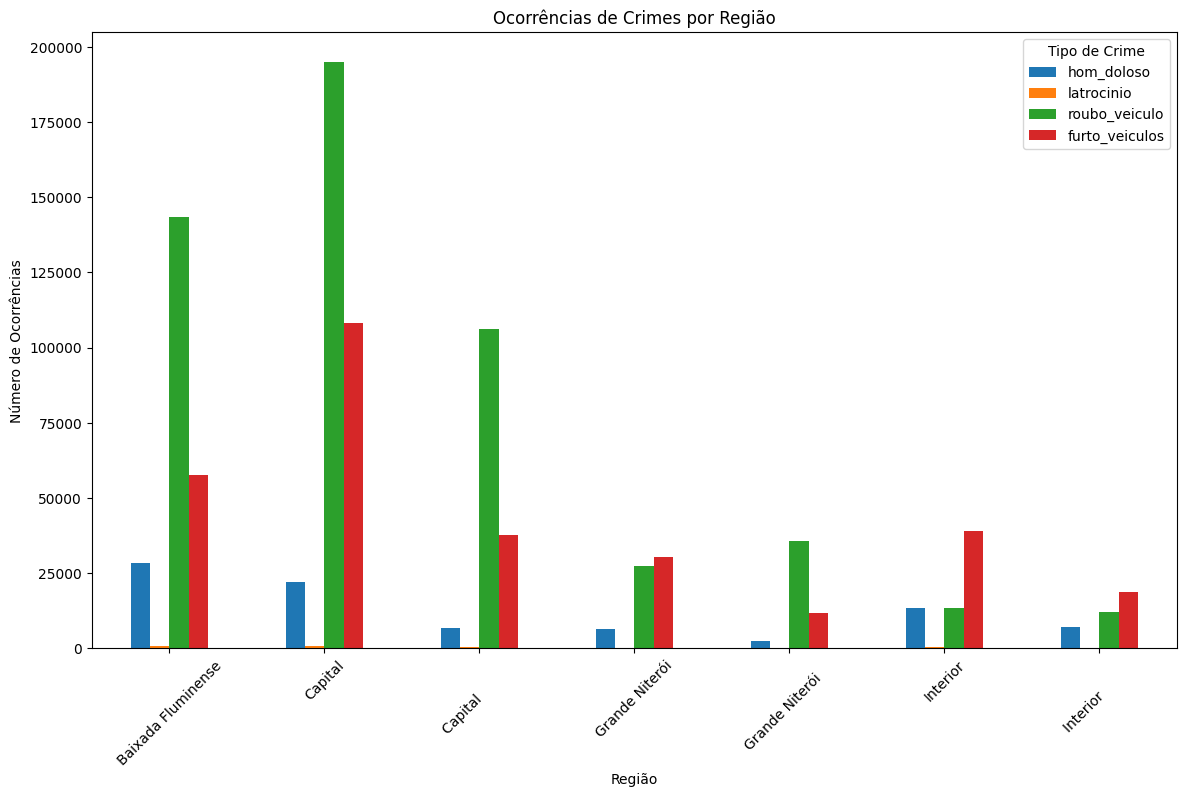

In [156]:
import matplotlib.pyplot as plt

# Excluir colunas de data antes de agrupar e somar
crimes_delegacias_numerico = crimes_delegacias.drop(columns=['mes', 'vano', 'data', 'mes_ano'])

# Agrupar os crimes por região e somar as ocorrências
crimes_por_regiao = crimes_delegacias_numerico.groupby('Regiao').sum()

# Selecionar as colunas de interesse para a análise
colunas_interesse = ['hom_doloso', 'latrocinio', 'roubo_veiculo', 'furto_veiculos', 'trafico_drogas']

# Filtrar as colunas de interesse
crimes_filtrados = crimes_por_regiao[colunas_interesse]

# Plotar um gráfico de barras para comparar as ocorrências de crimes por região
crimes_filtrados.plot(kind='bar', figsize=(14, 8))

# Configurações do gráfico
plt.title('Ocorrências de Crimes por Região')
plt.ylabel('Número de Ocorrências')
plt.xlabel('Região')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Crime')
plt.show()


Preparar os Dados

Index(['CISP', 'mes', 'vano', 'AISP', 'RISP', 'mcirc', 'hom_doloso',
       'lesao_corp_morte', 'latrocinio', 'hom_por_interv_policial',
       'tentat_hom', 'lesao_corp_dolosa', 'estupro', 'hom_culposo',
       'lesao_corp_culposa', 'roubo_comercio', 'roubo_residencia',
       'roubo_veiculo', 'roubo_carga', 'roubo_transeunte', 'roubo_em_coletivo',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_celular',
       'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta',
       'outros_roubos', 'total_roubos', 'furto_veiculos', 'furto_transeunte',
       'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'outros_furtos',
       'total_furtos', 'sequestro', 'extorsao', 'sequestro_relampago',
       'estelionato', 'apreensao_drogas', 'recuperacao_veiculos', 'apf',
       'aaapai', 'cmp', 'cmba', 'ameaca', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'indicador_letalidade', 'indicador_roubo_r

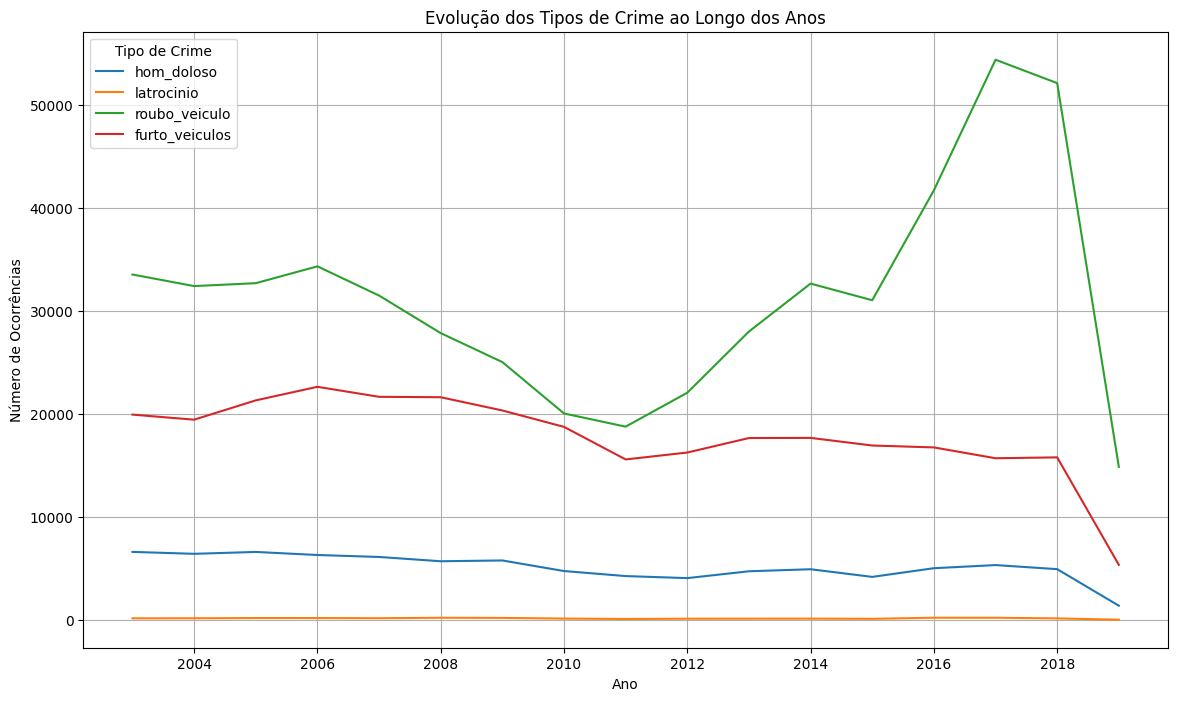

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'data' para o tipo datetime, se ainda não for
crimes_delegacias['data'] = pd.to_datetime(crimes_delegacias['data'], errors='coerce')

# Extrair o ano da coluna 'data'
crimes_delegacias['ano'] = crimes_delegacias['data'].dt.year

# Selecionar apenas as colunas numéricas para evitar o erro
colunas_numericas = crimes_delegacias.select_dtypes(include='number').columns

# Agrupar os dados por ano e somar as ocorrências de cada tipo de crime
crimes_por_ano = crimes_delegacias.groupby('ano')[colunas_numericas].sum()

# Verificar as colunas disponíveis após o agrupamento
print(crimes_por_ano.columns)

# Ajustar a lista de colunas de interesse com base nas colunas disponíveis
colunas_interesse = ['hom_doloso', 'latrocinio', 'roubo_veiculo', 'furto_veiculos']
colunas_interesse = [col for col in colunas_interesse if col in crimes_por_ano.columns]  # Ajustar colunas de interesse

crimes_por_ano_filtrados = crimes_por_ano[colunas_interesse]

# Plotar gráficos de linha para mostrar a evolução dos crimes ao longo dos anos
plt.figure(figsize=(14, 8))

for coluna in colunas_interesse:
    plt.plot(crimes_por_ano_filtrados.index, crimes_por_ano_filtrados[coluna], label=coluna)

# Configurações do gráfico
plt.title('Evolução dos Tipos de Crime ao Longo dos Anos')
plt.ylabel('Número de Ocorrências')
plt.xlabel('Ano')
plt.legend(title='Tipo de Crime')
plt.grid(True)
plt.show()


Análise de Correlação

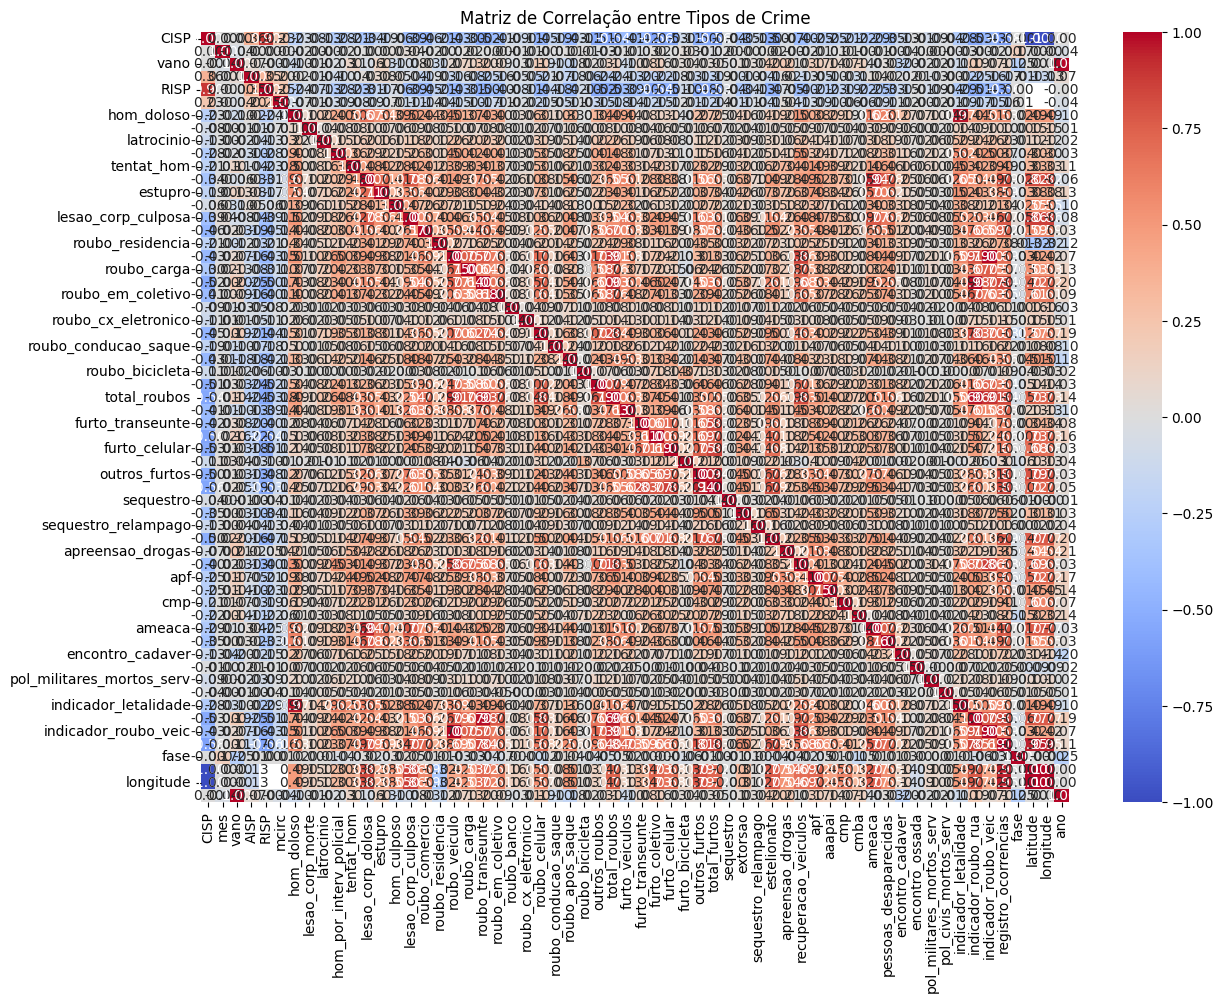

In [161]:
import seaborn as sns

# Calcular a matriz de correlação
correlacao = crimes_delegacias[colunas_numericas].corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Tipos de Crime')
plt.show()


#  Construção de um Modelo Preditivo

In [165]:
import pandas as pd
import numpy as np

# Exemplo de DataFrame (substitua pelo seu DataFrame real)
df = crimes_delegacias.copy()

# Verificar tipos de dados das colunas
print(df.dtypes)

# Verificar se há valores não numéricos
print(df.applymap(lambda x: not isinstance(x, (int, float, np.number))).sum())

# Substituir valores vazios por NaN e converter para numérico
df.replace('', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Verificar se há valores nulos
print(df.isnull().sum())

# Preencher valores nulos ou removê-los
df.fillna(0, inplace=True)  # Ou df.dropna(inplace=True)

# Definir a variável target
df['target'] = df['hom_doloso']  # ajuste conforme sua variável target

# Separar features e target
X = df[['latrocinio', 'roubo_veiculo', 'furto_veiculos', 'trafico_drogas']]  # ajuste conforme suas features
y = df['target']

# Divisão dos dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a serem testados
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Treinamento do modelo
    model.fit(X_train, y_train)
    
    # Previsões
    y_pred = model.predict(X_test)
    
    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R^2': r2}
    
    # Salvamento do modelo
    joblib.dump(model, f'{name}_model.pkl')

# Mostrar resultados
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"  R^2 Score: {metrics['R^2']:.2f}")


CISP           int64
mes            int64
vano           int64
mes_ano       object
AISP           int64
              ...   
endereco      object
delegado      object
latitude     float64
longitude    float64
ano            int32
Length: 70, dtype: object


C:\Users\Thaleson\AppData\Local\Temp\ipykernel_10484\839655710.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: not isinstance(x, (int, float, np.number))).sum())


CISP             0
mes              0
vano             0
mes_ano      26217
AISP             0
             ...  
endereco     26217
delegado     26217
latitude         0
longitude        0
ano              0
Length: 70, dtype: int64
CISP             0
mes              0
vano             0
mes_ano          0
AISP             0
             ...  
endereco     26217
delegado     26217
latitude     25825
longitude    25825
ano              0
Length: 70, dtype: int64
Linear Regression:
  Mean Squared Error: 16.66
  R^2 Score: 0.30
Random Forest:
  Mean Squared Error: 17.62
  R^2 Score: 0.26
Gradient Boosting:
  Mean Squared Error: 15.02
  R^2 Score: 0.37


In [166]:
import joblib

# Salvando o melhor modelo (Gradient Boosting)
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)  # Treine novamente com os dados
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [172]:
# Verifique as colunas usadas durante o treinamento
print("Colunas do DataFrame de treinamento:")
print(X_train.columns)


Colunas do DataFrame de treinamento:
Index(['latrocinio', 'roubo_veiculo', 'furto_veiculos', 'trafico_drogas'], dtype='object')


In [173]:
import pandas as pd
import joblib

# Dados de exemplo para teste
dados_teste = {
    'latrocinio': [10, 5],
    'roubo_veiculo': [20, 15],
    'furto_veiculos': [25, 20],
    'trafico_drogas': [15, 10],
}

# Criar DataFrame de teste
df_teste = pd.DataFrame(dados_teste)

# Reordenar as colunas para corresponder a X_train
df_teste = df_teste[['latrocinio', 'roubo_veiculo', 'furto_veiculos', 'trafico_drogas']]

# Carregar o modelo treinado
best_model = joblib.load('best_model.pkl')

# Fazer previsões com o modelo
previsoes = best_model.predict(df_teste)

# Exibir previsões
print("Previsões do modelo:")
print(previsoes)

# Explicação das previsões
print("\nExplicação das Previsões:")
for i, previsao in enumerate(previsoes):
    print(f"Para o conjunto de dados de teste {i+1}:")
    print(f"  - O modelo prevê uma demanda de aproximadamente {previsao:.2f} unidades.")
    print("  - Isso significa que, com as condições fornecidas, a quantidade esperada de crimes ou ocorrências é estimada em {:.2f}.".format(previsao))
    print()


Previsões do modelo:
[14.29015233 13.19838042]

Explicação das Previsões:
Para o conjunto de dados de teste 1:
  - O modelo prevê uma demanda de aproximadamente 14.29 unidades.
  - Isso significa que, com as condições fornecidas, a quantidade esperada de crimes ou ocorrências é estimada em 14.29.

Para o conjunto de dados de teste 2:
  - O modelo prevê uma demanda de aproximadamente 13.20 unidades.
  - Isso significa que, com as condições fornecidas, a quantidade esperada de crimes ou ocorrências é estimada em 13.20.

